In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Code to save figures as High-res PNG
import os
from pathlib import Path
from matplotlib import pyplot as plt

IMAGES_PATH = Path() / "images/Outliers"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
# Load dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Detect Outliers

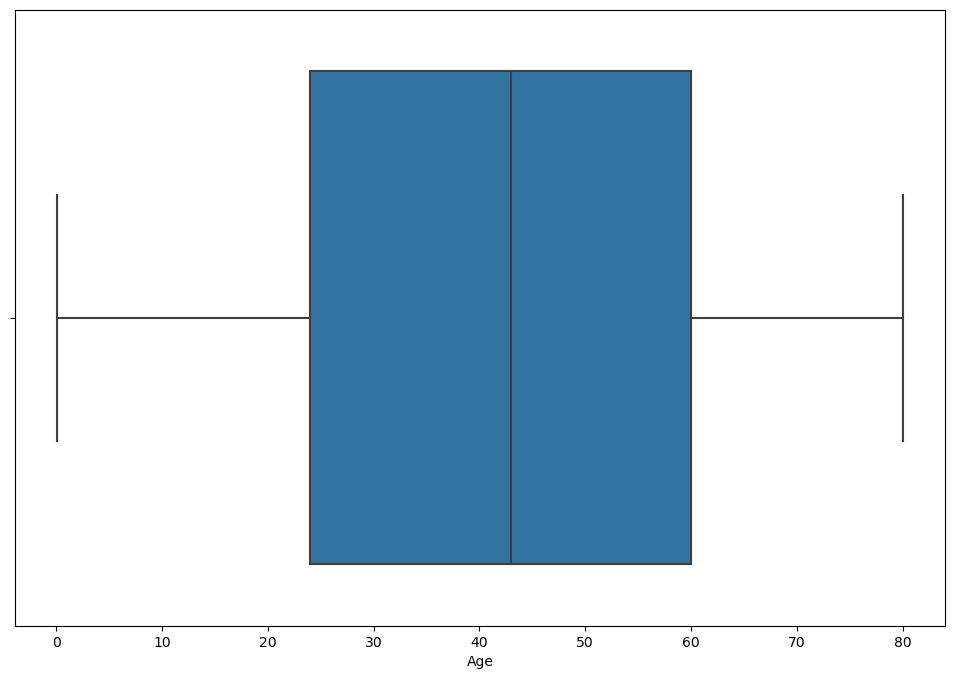

In [3]:
# box plot
plt.figure(figsize = (12, 8))
sns.boxplot(x = df["age"])
plt.xlabel("Age")
plt.show()

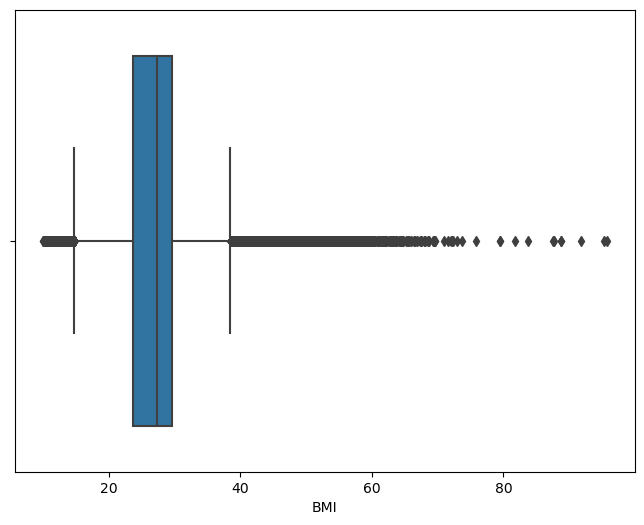

In [5]:
# box plot
plt.figure(figsize = (8, 6))
sns.boxplot(x = df["bmi"])
plt.xlabel("BMI")
plt.show()

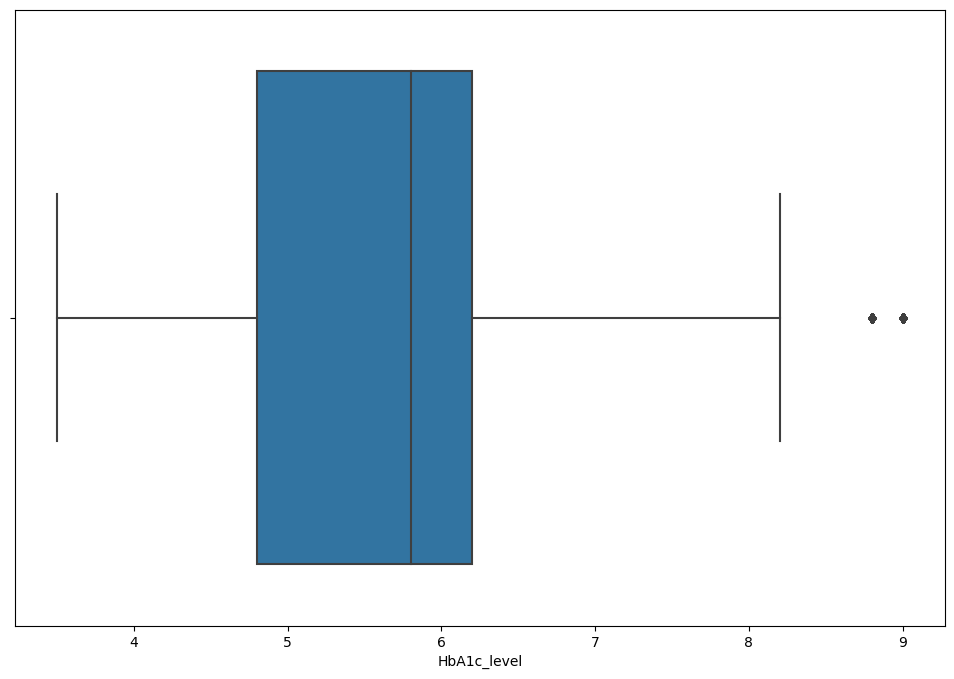

In [7]:
# box plot
plt.figure(figsize = (12, 8))
sns.boxplot(x = df["HbA1c_level"])
plt.xlabel("HbA1c_level")
plt.show()

# Count Outliers

In [24]:
def count_outliers(data, column):
    # Find Q1, Q3
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Min and Max Calculation
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Counting outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

In [25]:
attributes = ["age", "bmi", "HbA1c_level"]

for attribute in attributes:
    count = count_outliers(df, attribute)
    print(attribute, "---->", count, " out of ", len(df[attribute]))

age ----> 0  out of  100000
bmi ----> 7086  out of  100000
HbA1c_level ----> 1315  out of  100000


In [15]:
bin_df = df["age"]
bin_df.describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [20]:
df["age"].describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

# Remove Outliers

In [26]:
def remove_outliers(data, column):
    # Find Q1, Q3
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Min and Max Calculation
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Counting outliers
    cleaned_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_outliers

In [27]:
cleaned_df = remove_outliers(df, "bmi")
print(df.shape)
print(cleaned_df.shape)

(100000, 9)
(92914, 9)


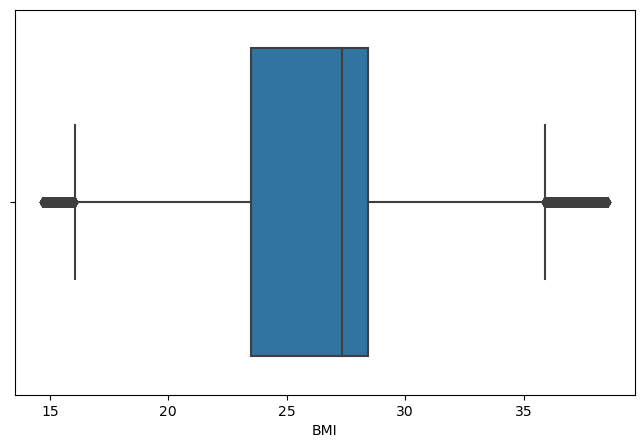

In [28]:
# Box plot on cleaning dataset
plt.figure(figsize = (8, 5))

sns.boxplot(x = cleaned_df["bmi"])

plt.xlabel("BMI")

plt.show()